In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from simulation.analyse import get_win_probabilities, get_simulations

In [ ]:
match_template = pd.read_csv('data/original/wc_2018_games.csv')
teams = pd.unique(match_template[['home_team', 'away_team']].values.ravel('K'))[0:32]
match_ids = match_template["id"]

simulations = get_simulations("data/simulations/outcome/*.csv")

In [ ]:
match_wise_probabilities = get_win_probabilities(simulations, teams, match_ids)

In [ ]:
final = match_wise_probabilities.loc[match_wise_probabilities["match_id"] == 63]
final["World Cup 2018 Win Probability"] = final["plays_match_prob"] * final["win_prob"]
final[['World Cup 2018 Win Probability','team']].set_index('team').plot.bar(legend=False)

In [2]:
from features.data_provider import get_whole_dataset
from models.outcome_model import get_model
from simulation.predictor import MaxProbabilityPredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import store_simulation_results, delete_all

X, y = get_whole_dataset("home_win")
model = get_model(X=X, y=y)
predictor = MaxProbabilityPredictor(model)

In [3]:
match_template = pd.read_csv('data/original/wc_2018_games_real.csv')
run_actual_tournament_simulation(match_template, predictor)
store_simulation_results("data/simulations/tmp/single_simulation.csv")
delete_all()

In [62]:
simulation = pd.read_csv('data/simulations/tmp/single_simulation.csv')
simulation.iloc[30:50]

,Unnamed: 0,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob
30,30,31,30,2018-06-24,Japan,Senegal,2,2,-1,0.324655,0.316677,0.358667
31,31,32,31,2018-06-24,Poland,Colombia,0,3,-1,0.300296,0.293297,0.406407
32,32,33,32,2018-06-25,Saudi Arabia,Egypt,2,1,-1,0.273320,0.300411,0.426270
33,33,34,33,2018-06-25,Uruguay,Russia,3,0,1,0.359153,0.294242,0.346606
34,34,35,34,2018-06-25,Spain,Morocco,2,2,1,0.626199,0.216525,0.157276
35,35,36,35,2018-06-25,IR Iran,Portugal,1,1,-1,0.147896,0.222201,0.629903
36,36,37,36,2018-06-26,Australia,Peru,0,2,-1,0.301013,0.299124,0.399864
37,37,38,37,2018-06-26,Denmark,France,0,0,-1,0.196753,0.268610,0.534637
38,38,39,38,2018-06-26,Iceland,Croatia,1,2,-1,0.159207,0.245355,0.595439
39,39,40,39,2018-06-26,Nigeria,Argentina,1,2,-1,0.163740,0.250239,0.586021


In [64]:
simulation["true_outcome"] = np.sign(simulation["home_score"] - simulation["away_score"])

In [18]:
match_bets = pd.read_csv('data/original/wc_2018_bets.csv')

y_pred = simulation["outcome"].values
y_true = simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values

bet_size = 1
initial_capital = 64
bank = initial_capital
for i in range(len(y_true)):
    if bank <= bet_size:
        print("Bank empty")
        break
    bank -= bet_size
    predicted_outcome = y_pred[i]
    if y_true[i] == predicted_outcome:
        if predicted_outcome == 1:
            odd = odds[i, 0]
        elif predicted_outcome == 0:
            odd = odds[i, 1]
        else:
            odd = odds[i, 2]
        bank += odd * bet_size
print(bank/initial_capital)
print(bank)

1.0765625
68.9


In [59]:
match_bets = pd.read_csv('data/original/wc_2018_bets.csv')

    id        date       home_team    away_team     1     X      2
20  20  2018-06-21         Denmark    Australia  1.91  3.43   4.67
21  21  2018-06-21          France         Peru  1.61  3.87   6.59
22  22  2018-06-21       Argentina      Croatia  2.08  3.29   4.11
23  23  2018-06-22          Brazil   Costa Rica  1.21  6.69  18.95
24  24  2018-06-22         Nigeria      Iceland  2.98  3.09   2.72
25  25  2018-06-22          Serbia  Switzerland  2.76  3.06   2.95
26  26  2018-06-23         Belgium      Tunisia  1.33  5.19  12.07
27  27  2018-06-23  Korea Republic       Mexico  5.74  3.81   1.70
28  28  2018-06-23         Germany       Sweden  1.47  4.65   7.61
29  29  2018-06-24         England       Panama  1.22  6.47  18.64
30  30  2018-06-24           Japan      Senegal  3.22  2.99   2.64
31  31  2018-06-24          Poland     Colombia  3.50  3.46   2.21
32  32  2018-06-25    Saudi Arabia        Egypt  5.47  3.63   1.77
33  33  2018-06-25         Uruguay       Russia  2.79  3.08   

In [66]:


y_pred = simulation["outcome"].values
y_true = simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values

teams = simulation[["home_team", "away_team"]].values

initial_capital = 64
bank = initial_capital

bets = []
banks = []
wins = []
loses = []
for i in range(len(y_true)):
    predicted_outcome = y_pred[i]
    if predicted_outcome == 1:
        odd = odds[i, 0]
        p = probabilities[i, 0]
    elif predicted_outcome == 0:
        odd = odds[i, 1]
        p = probabilities[i, 1]
    else:
        odd = odds[i, 2]
        p = probabilities[i, 2]
    
    b = odd-1
    q = 1-p
    f = max((b*p - q)/b, 0)
    bet_size = bank * f
    
    banks.append(bank)
    bets.append(bet_size)

    bank -= bet_size
   
    if y_true[i] == predicted_outcome:
        win = odd * bet_size
        bank += win
        if win > 0:
            wins.append(bet_size)
    else:
        if bet_size > 0:
            loses.append(bet_size)
        


banks.append(bank)
bets.append(bet_size)

print(bank/initial_capital)
print(bank)
print(np.mean(wins))
print(np.mean(loses))

1.74870169689
111.916908601
6.81115825912
5.92791577444


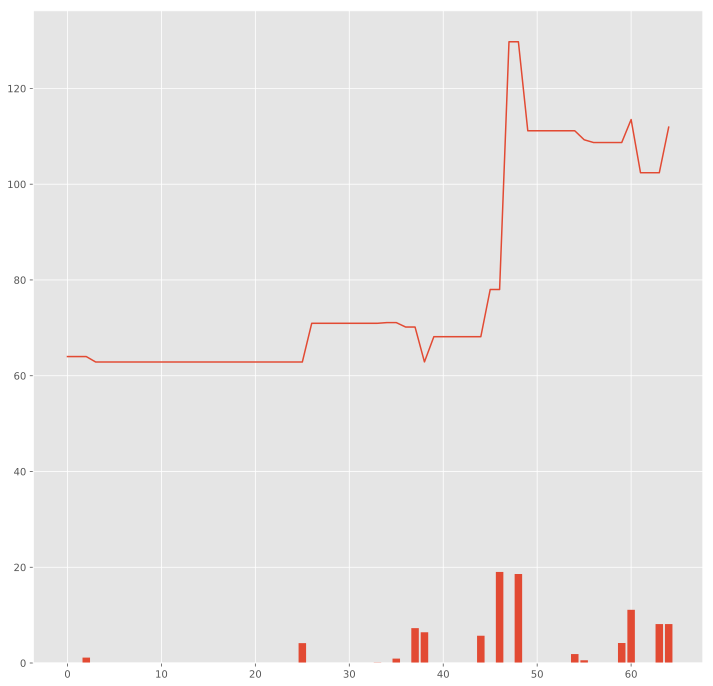

In [53]:
fig, ax = plt.subplots(figsize=(12, 12))
index = np.arange(len(bets))
ax.bar(index, bets) 
ax.plot(banks)

In [56]:
probabilities[46]

array([ 0.27575841,  0.27712575,  0.44711585])